# Bitcoin analysis based on historical data using Pyspark 

**Goals**:
1. Importing Bitcoin Historical dataset to Spark.
2. Understanding of the dataset
3. Visualizing the data 
3. Performing analysis by Linear Regression
4. Present/Visualize your results.


**Cryptocurrency** -> "Digital currency", used in mathematical operations and with a strong appeal for decentralization of financial resources and greater agility, privacy and security than the current alternatives.

**BTC** -> Bitcoin, the first cryptography developed and launched commercially for trading, considered stronger and more stable than those currently existing due to its "resilience" to crises and devaluations.

**USD** -> United States Dollar or American Dollar, currency used as a reference for most exchanges, due to an easy conversion between BTC and USD.

**Bitstamp** -> Online crypto exchange responsible for facilitating negotiations between traders; Information related to the value and how it was made, serving as a database for this study.

**Negotiator** -> Negotiator who operates in the market (in this case, crypto), using, through consecutive purchase and sale operations, to make a profit.

**Long** -> Investment used / "betting" profit in case of increase in the value of the asset, normally involving the purchase of lower values ​​and the sale of higher values.

**Short** -> Wins by "renting" higher value assets, selling the same rights and buying back a lower price, returning the same amount of assets (which is less than "rented") and profiting from a difference between the value at the time of the sale and the repurchase.



# Columns

**Timestamp** -> Date (in Epoch Unix format) of data collection; It will later be transformed into a "human" date for better understanding; Intervals of approximately 1 in 1 minute, with time zone set to UTC.

**Open** -> Initial currency trading value in that measurement range, in USD.

**High** -> Highest value reached by the asset during that measurement interval, in USD.

**Low** -> Lowest value reached by the asset during that measurement interval, in USD.

**Close** -> Value of the asset at the time of closing the measurement range, in USD.

**Volume_ (BTC)** -> Volume, in BTC, traded on Bitstamp during a given measurement interval

**Volume_ (Currency)** -> Volume, in USD, traded on Bitstamp during a given measurement interval;

**Weighted_Price** -> Average asset price in that range, in USD; Calculated based on traded volumes; It will be considered as the average price for analytical issues.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Installing Spark and importing all required ML and Visualization Libraries

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 198 kB 83.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=113c1348d617c4d62a2ebc8222a1019c9b29c5b3b1ab99ac9e38a0ca9385bb70
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer

import numpy as np # linear algebra
import pandas as pd

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

from matplotlib import rcParams
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
rcParams['figure.figsize'] = 18,4

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# setting random seed for notebook reproducability
rnd_seed=23
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

# Creating the Spark Session

In [ ]:
sc = SparkContext(appName = "Bitcoin_Analysis_1")
spark = SparkSession.Builder().getOrCreate()

In [ ]:
spark

In [ ]:
sqlContext = SQLContext(spark.sparkContext)
sqlContext

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


# Performing Spark commands using Pyspark

In [ ]:
#Loading Data to dataframe
df= sqlContext.read.csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv', header='true', inferSchema='true')

In [ ]:
df.show()

+----------+----+----+----+-----+------------+-----------------+--------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|
+----------+----+----+----+-----+------------+-----------------+--------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|
|1325317980| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318040| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318100| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318160| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318220| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318280| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318340| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318400| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318460| NaN| NaN| NaN|  NaN|       

In [ ]:
#getting the schema info from the dataframe
df.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume_(BTC): double (nullable = true)
 |-- Volume_(Currency): double (nullable = true)
 |-- Weighted_Price: double (nullable = true)



# Data Exploration and Preprocessing

In [ ]:
# Count total number of rows
df.count()
# Count the total number of columns
len(df.columns)

2811640

8

In [ ]:
df.createOrReplaceTempView('bitstampUSD') #creating a temp view table
bitstampUSD = sqlContext.sql("select *,from_unixtime(Timestamp) as `dateTime` from bitstampUSD")
bitstampUSD=bitstampUSD.dropna('any') # Removing null values

In [ ]:
bitstampUSD.show()
# Count total number of rows after removing the null values
bitstampUSD.count()

+----------+----+----+----+-----+------------+-----------------+--------------+-------------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|           dateTime|
+----------+----+----+----+-----+------------+-----------------+--------------+-------------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|2011-12-31 07:52:00|
|1325346600|4.39|4.39|4.39| 4.39|        48.0|           210.72|          4.39|2011-12-31 15:50:00|
|1325350740| 4.5|4.57| 4.5| 4.57| 37.86229723|     171.38033753|  4.5264114983|2011-12-31 16:59:00|
|1325350800|4.58|4.58|4.58| 4.58|         9.0|            41.22|          4.58|2011-12-31 17:00:00|
|1325391360|4.58|4.58|4.58| 4.58|       1.502|          6.87916|          4.58|2012-01-01 04:16:00|
|1325431680|4.84|4.84|4.84| 4.84|        10.0|             48.4|          4.84|2012-01-01 15:28:00|
|1325457900| 5.0| 5.0| 5.0|  5.0|        10.1|             50.5|           5.0|2012-01-01 22:45:00|


1622409

In [ ]:
#Renaming the columns 
bitstampUSD=bitstampUSD.withColumnRenamed("Volume_(BTC)", "VolBTC").withColumnRenamed("Volume_(Currency)", "VolCurrency")

In [ ]:
#Creating another dataframe to perform Datetime Visualization 
DateTime_df= bitstampUSD
#DateTime_df.show()

In [ ]:
#Splitting the dataframe by required columns
splitDF = DateTime_df.withColumn("date",split(col("dateTime")," ").getItem(0))
splitDF = splitDF.withColumn("time",split(col("dateTime")," ").getItem(1))
#splitDF.printSchema()
#splitDF.show()

In [ ]:
#Splitting the dataframe by required columns
splitDFHour = splitDF.withColumn("hour",split(col("time"),":").getItem(0))
#splitDFHour.printSchema()
#splitDFHour.show()

In [ ]:
#Arranging Dataframe with column date and time and day_of_week
splitDFHour= splitDFHour.withColumn("date",splitDFHour["date"].cast(DateType())).withColumn("hour",splitDFHour["hour"].cast(DoubleType())).withColumn("dateTime",splitDFHour["dateTime"].cast(DateType()))
splitDFHour=splitDFHour.withColumn('day_of_week',dayofweek(splitDFHour.date))
#splitDFHour.printSchema()

In [ ]:
#Arranging Dataframe with column date and time and year
splitDFWithYear = splitDFHour.withColumn("year",split(col("date"),"-").getItem(0))
splitDFWithYear.show()

+----------+----+----+----+-----+-----------+------------+--------------+----------+----------+--------+----+-----------+----+
| Timestamp|Open|High| Low|Close|     VolBTC| VolCurrency|Weighted_Price|  dateTime|      date|    time|hour|day_of_week|year|
+----------+----+----+----+-----+-----------+------------+--------------+----------+----------+--------+----+-----------+----+
|1325317920|4.39|4.39|4.39| 4.39| 0.45558087|2.0000000193|          4.39|2011-12-31|2011-12-31|07:52:00| 7.0|          7|2011|
|1325346600|4.39|4.39|4.39| 4.39|       48.0|      210.72|          4.39|2011-12-31|2011-12-31|15:50:00|15.0|          7|2011|
|1325350740| 4.5|4.57| 4.5| 4.57|37.86229723|171.38033753|  4.5264114983|2011-12-31|2011-12-31|16:59:00|16.0|          7|2011|
|1325350800|4.58|4.58|4.58| 4.58|        9.0|       41.22|          4.58|2011-12-31|2011-12-31|17:00:00|17.0|          7|2011|
|1325391360|4.58|4.58|4.58| 4.58|      1.502|     6.87916|          4.58|2012-01-01|2012-01-01|04:16:00| 4.0|  

In [ ]:
# Spark to Pandas dataframe
pandas_converted=splitDFWithYear.toPandas()

In [ ]:
#Getting the values in list so that we can plot and visualize it
hour=pandas_converted["hour"].values.tolist()
weighted_price=pandas_converted["Weighted_Price"].values.tolist()
volume_BTC=pandas_converted["VolBTC"].values.tolist()
date_of_week=pandas_converted["day_of_week"].values.tolist()
year=pandas_converted["year"].values.tolist()

# Data Visualization

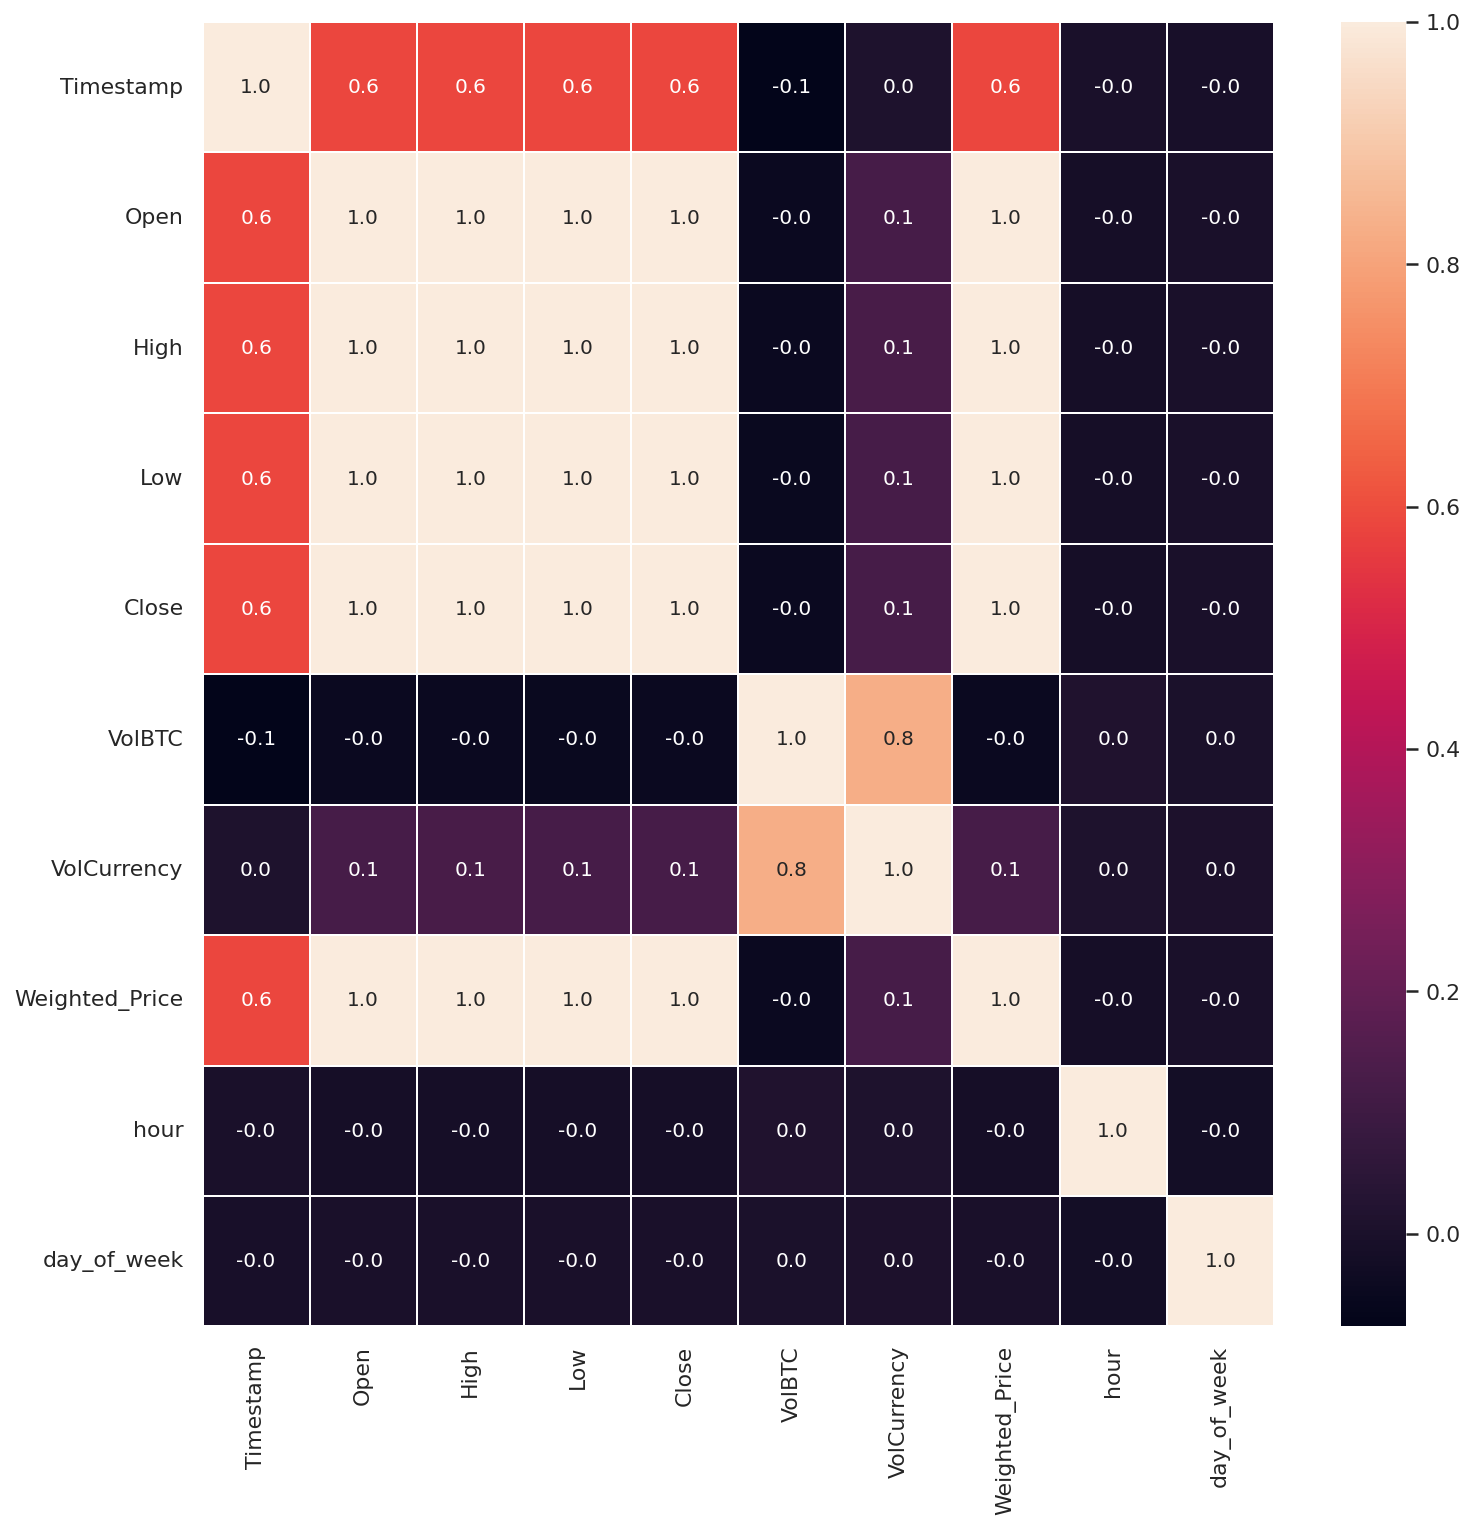

In [ ]:
#Correlation plotting the heatmap using Seaborn
corr=pandas_converted.corr()
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.1f',ax=ax)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'BTC Volume')

Text(0, 0.5, 'Currency Volume')

Text(0.5, 1.0, 'BTC-Currency Scatter Plot')

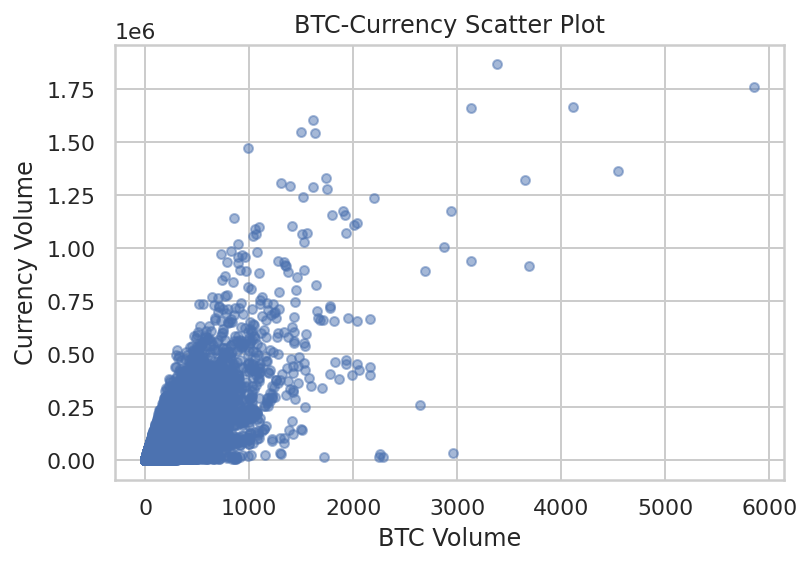

In [ ]:
# Scatter Plot usage by Matplotlib
# x = open, y = close
pandas_converted.plot(kind='scatter', x='VolBTC', y='VolCurrency',alpha = 0.5)
plt.xlabel('BTC Volume')            
plt.ylabel('Currency Volume')
plt.title('BTC-Currency Scatter Plot') 
plt.show()

<Figure size 1152x288 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'price at the start of the time window')

Text(0.5, 1.0, 'Line plot')

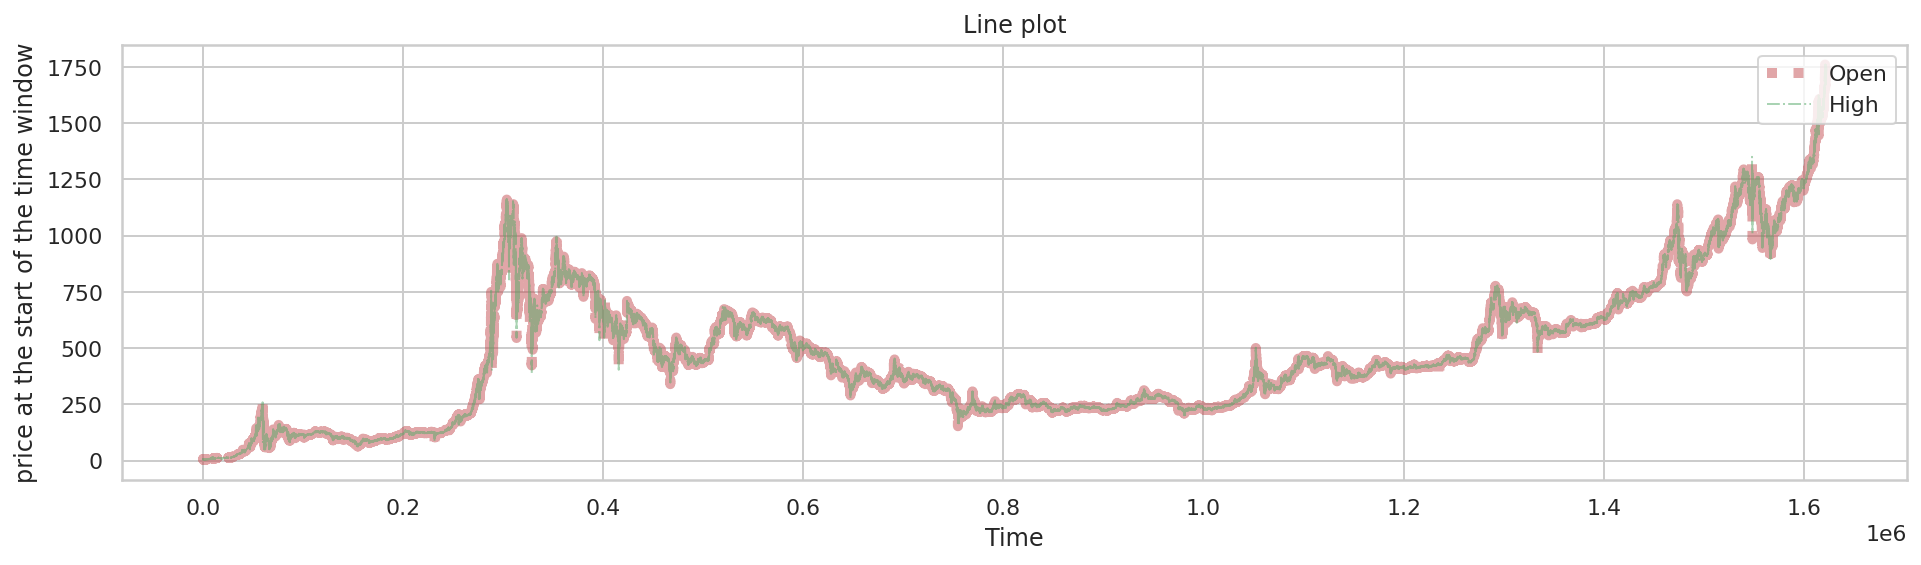

In [ ]:
# Line Plot usage by Matplotlib plotting Open with High with Time on X axis
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = gray square background, linestyle = sytle of line

plt.figure(figsize=(16,4))
pandas_converted.Open.plot(kind='line', color='r', label='Open', alpha=0.5, linewidth=5, grid=True, linestyle=':')
pandas_converted.High.plot(color='g', label='High', linewidth=1, alpha=0.5, grid=True, linestyle='-.')
plt.legend(loc='upper right') #legend put label into plot
plt.xlabel('Time')
plt.ylabel('price at the start of the time window')
plt.title('Line plot')
plt.show()

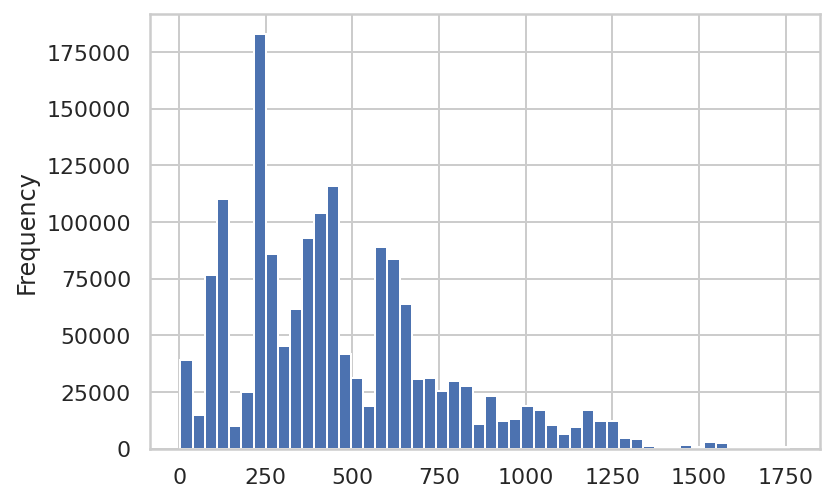

In [ ]:
#Histogram plot of Open price
pandas_converted.Open.plot(kind='hist', bins=50)

Text(0.5, 0, 'hour')

Text(0, 0.5, 'Weighted_Price')

Text(0.5, 1.0, 'Price by Hour')

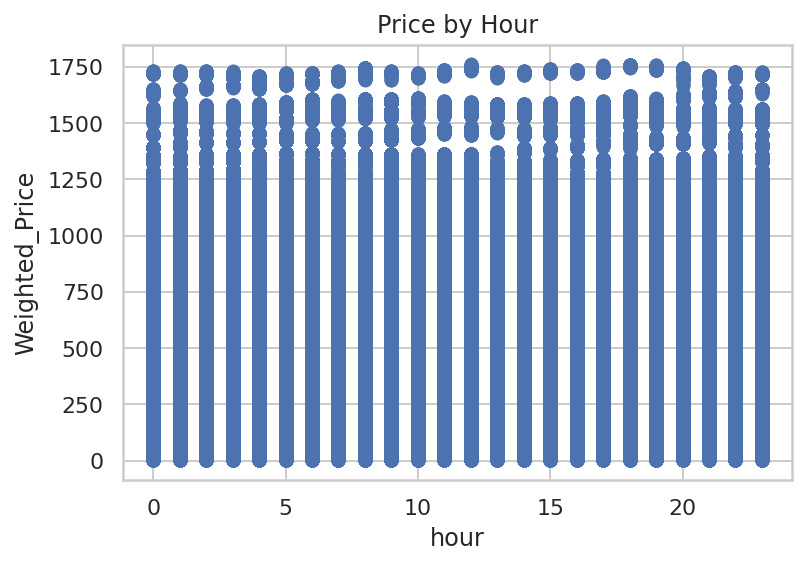

In [ ]:
#Plot of Weighted_price per hour in scatter plot using Matplotlib
plt.plot(hour,weighted_price , 'bo')
#group1_pd.plot(kind='scatter', x='hour', y='Weighted_Price',alpha = 0.01)
plt.xlabel('hour')            
plt.ylabel('Weighted_Price')
plt.title('Price by Hour') 
plt.show()

Text(0.5, 0, 'day_of_week')

Text(0, 0.5, 'Weighted_Price')

Text(0.5, 1.0, 'Price By Week')

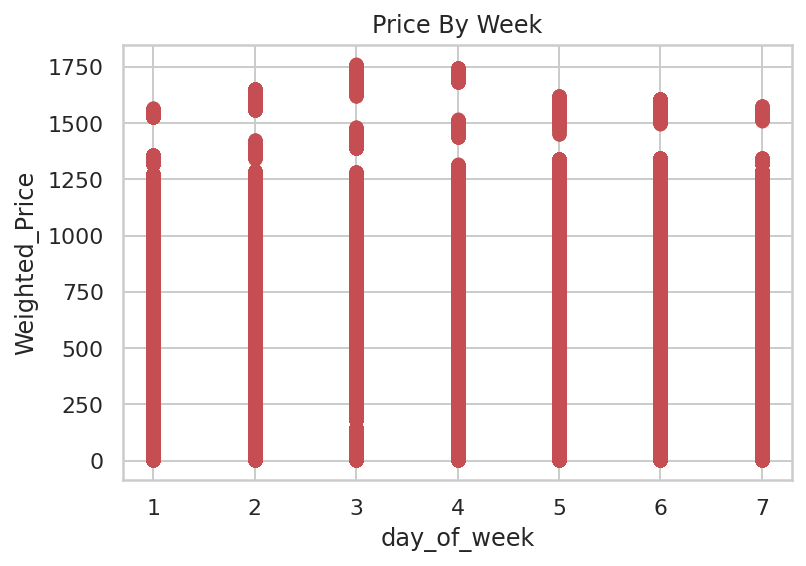

In [ ]:
#Plot of Weighted_price per week in scatter plot using Matplotlib
plt.plot(date_of_week, weighted_price, 'ro')
#group1_pd.plot(kind='scatter', x='hour', y='Weighted_Price',alpha = 0.01)
plt.xlabel('day_of_week')            
plt.ylabel('Weighted_Price')
plt.title('Price By Week') 
plt.show()

Text(0.5, 0, 'hour')

Text(0, 0.5, 'VolBTC')

Text(0.5, 1.0, 'Volume by Hour of day')

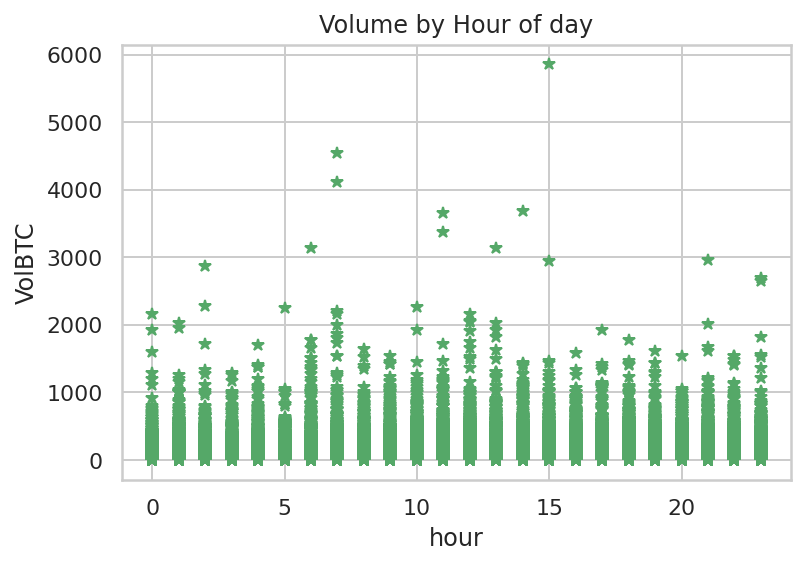

In [ ]:
#Plot of VolBTC per hour change displayed in scatter plot using Matplotlib
plt.plot(hour, volume_BTC, 'g*')
#group1_pd.plot(kind='scatter', x='hour', y='Weighted_Price',alpha = 0.01)
plt.xlabel('hour')            
plt.ylabel('VolBTC')
plt.title('Volume by Hour of day') 
plt.show()

Text(0.5, 0, 'day_of_week')

Text(0, 0.5, 'VolBTC')

Text(0.5, 1.0, 'Volume By Week')

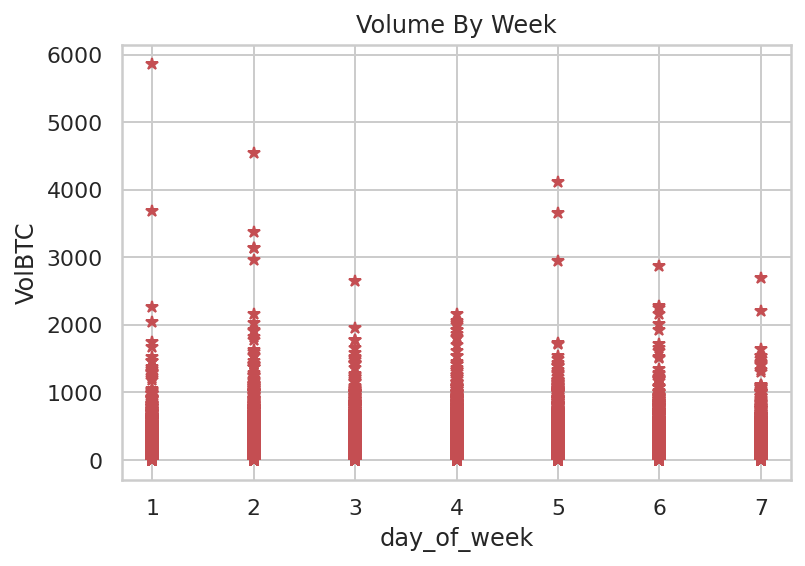

In [ ]:
#Plot of VolBTC per day_of_Week change displayed in scatter plot using Matplotlib
plt.plot(date_of_week,volume_BTC , 'r*')
plt.xlabel('day_of_week')            
plt.ylabel('VolBTC')
plt.title('Volume By Week') 
plt.show()

Text(0.5, 0, 'year')

Text(0, 0.5, 'Weighted_Price')

Text(0.5, 1.0, 'Weighted Price plotted yearly basis')

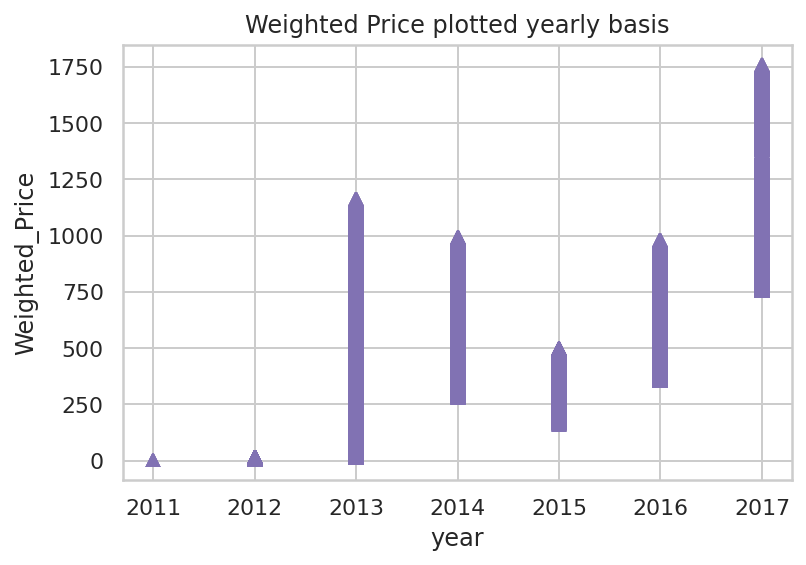

In [ ]:
#Plot of Price per year change displayed in scatter plot using Matplotlib
plt.plot(year,weighted_price , 'm^')
plt.xlabel('year')            
plt.ylabel('Weighted_Price')
plt.title('Weighted Price plotted yearly basis') 
plt.show()

Text(0.5, 0, 'year')

Text(0, 0.5, 'volume_BTC')

Text(0.5, 1.0, 'volume_BTC plotted yearly basis')

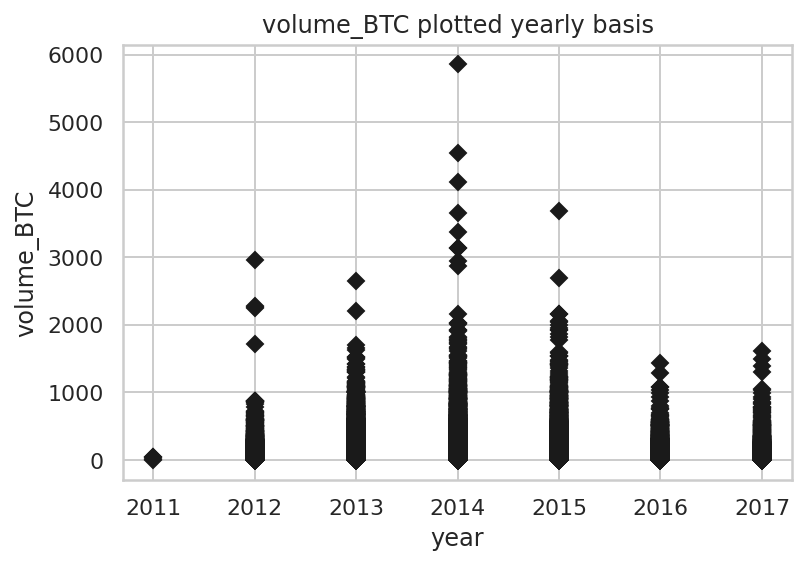

In [ ]:
#Plot of Price per year change displayed in scatter plot using Matplotlib
plt.plot(year,volume_BTC , 'kD')
plt.xlabel('year')            
plt.ylabel('volume_BTC')
plt.title('volume_BTC plotted yearly basis') 
plt.show()

# Feature Engineering/Extraction
**Use a VectorAssembler to put features into a feature vector column**

We have generated enough information post preprocessing our data to feed it to the model.
We are aren't caring about missing values; all zero values have been excluded from the data set.
Next we would normalize our data, as minimize the ranges between Min and max values

In [ ]:
# put features into a feature vector column
assembler = VectorAssembler(inputCols=['Open','High', 'VolBTC', 'VolCurrency','Weighted_Price'], outputCol="features")
assembled_df = assembler.transform(bitstampUSD)
assembled_df.show(10, truncate=False)

+----------+----+----+----+-----+-----------+------------+--------------+-------------------+------------------------------------------------+
|Timestamp |Open|High|Low |Close|VolBTC     |VolCurrency |Weighted_Price|dateTime           |features                                        |
+----------+----+----+----+-----+-----------+------------+--------------+-------------------+------------------------------------------------+
|1325317920|4.39|4.39|4.39|4.39 |0.45558087 |2.0000000193|4.39          |2011-12-31 07:52:00|[4.39,4.39,0.45558087,2.0000000193,4.39]        |
|1325346600|4.39|4.39|4.39|4.39 |48.0       |210.72      |4.39          |2011-12-31 15:50:00|[4.39,4.39,48.0,210.72,4.39]                    |
|1325350740|4.5 |4.57|4.5 |4.57 |37.86229723|171.38033753|4.5264114983  |2011-12-31 16:59:00|[4.5,4.57,37.86229723,171.38033753,4.5264114983]|
|1325350800|4.58|4.58|4.58|4.58 |9.0        |41.22       |4.58          |2011-12-31 17:00:00|[4.58,4.58,9.0,41.22,4.58]                      |

The result displays that the features have transformed into a Dense Vector.

# Normalization

Now we can scale the data using Min_Max_Scaler. The input columns are the features, and the output column with the rescaled that will be included in the scaled_df will be named "scaled_features".


In [ ]:
# Initialize the `Min_Max_scaler`
Min_Max_scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
# Fit the DataFrame to the scaler
scaled_df= Min_Max_scaler.fit(assembled_df).transform(assembled_df)
# Inspect the result
scaled_df.select("features", "scaled_features").show(10, truncate=False)
scaled_df.columns

+------------------------------------------------+-------------------------------------------------------------------------------------------------------------+
|features                                        |scaled_features                                                                                              |
+------------------------------------------------+-------------------------------------------------------------------------------------------------------------+
|[4.39,4.39,0.45558087,2.0000000193,4.39]        |[3.358818606716498E-4,3.3587612433109407E-4,7.782582427582654E-5,1.0718753946147746E-6,3.3604137398717205E-4]|
|[4.39,4.39,48.0,210.72,4.39]                    |[3.358818606716498E-4,3.3587612433109407E-4,0.008199728766573702,1.1293279048681124E-4,3.3604137398717205E-4]|
|[4.5,4.57,37.86229723,171.38033753,4.5264114983]|[3.9850390249178804E-4,4.3834680633041123E-4,0.006467928495112392,9.18491825732464E-5,4.1373613215052945E-4] |
|[4.58,4.58,9.0,41.22,4.58]       

['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'VolBTC',
 'VolCurrency',
 'Weighted_Price',
 'dateTime',
 'features',
 'scaled_features']

# Building A Machine Learning Model With Spark ML

As we have finished the preprocessing of our data, now we would build our Linear Regression model. We first need to split the data into training and test sets which we would do with the randomSplit() method:

In [ ]:
# Split the data into train,test and Validation sets
train_data, test_data = scaled_df.randomSplit([.7, .3], seed=rnd_seed)

**Now we create an ElacticNet Linear Regression Model**
ElasticNet is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of l1 and l2 using the l1_ratio parameter.
Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.
Source: https://scikit-learn.org/stable/modules/linear_model.html#elastic-net

In [ ]:
# Initialize `lr`
lr = (LinearRegression(featuresCol='scaled_features' , labelCol="Weighted_Price", predictionCol='Predicted_price', 
                               maxIter=100, regParam=0.3, elasticNetParam=0.8, standardization=False))

In [ ]:
# Fit the data to the model
linearModel = lr.fit(train_data)

**Generate Predictions**

In [ ]:
# Generate predictions
predictions = linearModel.transform(test_data)
# Select the columns and store in a variable
pred_data= predictions.select("Predicted_price", "Weighted_Price").show(10)

+-----------------+--------------+
|  Predicted_price|Weighted_Price|
+-----------------+--------------+
|7.527617781076819|          4.39|
|7.716287647108318|          4.58|
|8.133347350967423|           5.0|
|8.451107125336263|          5.32|
|8.421317146489184|          5.29|
|8.421317146489184|          5.29|
|8.322017216998923|          5.19|
|8.494288806212202|  5.3604618117|
|8.900285561814865|   5.777027027|
| 9.12634664587005|           6.0|
+-----------------+--------------+
only showing top 10 rows



**Inspect the Metrics**

Now we look at some metrics to get a better idea of how good your model is performing actually. We will use Regression Evaluator and LinearRegressionModel.summary attribute to pull up the rootMeanSquaredError.
The RMSE measures how much error there is between two datasets comparing a predicted value and an observed or known value. The smaller an RMSE value, the closer predicted and observed values are.

In [ ]:
# Select (predicted_price, Weighted_price label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Weighted_Price", predictionCol="Predicted_price", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.11396


Text(0.5, 1.0, 'Log Training Error vs. Iterations')

Text(0.5, 0, 'Log Training Error')

Text(0, 0.5, 'Iterations')

MAE: 1.6479859788043492


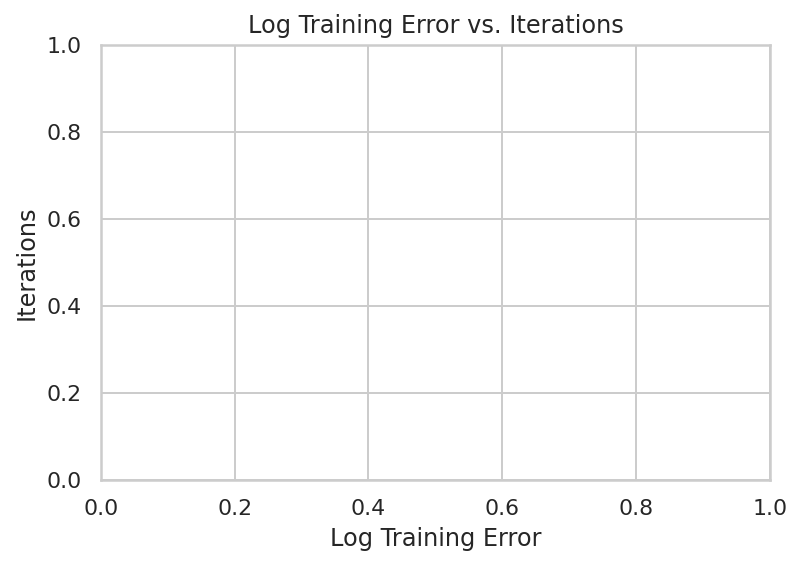

In [ ]:
#Inspect and Model the metrics and Coefficient and Visualize the log of the training error as a function of iteration. 
#The scatter plot visualizes the logarithm of the training error for all 10 iterations.

iterations = list(range(1,linearModel.summary.totalIterations + 1))
lossHistory = np.log(linearModel.summary.objectiveHistory)
#plt.plot(iterations,lossHistory,'')
plt.title('Log Training Error vs. Iterations')
plt.xlabel('Log Training Error')
plt.ylabel('Iterations')
# Intercept for the model
print("MAE: {0}".format(linearModel.summary.meanAbsoluteError))

In [ ]:
#Use this model for prediction on test data. Calculate Root Mean Square Error of our model.
predictionsTest = linearModel.transform(test_data)
predictionsTest.select("Predicted_price", "Weighted_Price").show(10)

rmse = evaluator.evaluate(predictionsTest)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+-----------------+--------------+
|  Predicted_price|Weighted_Price|
+-----------------+--------------+
|7.527617781076819|          4.39|
|7.716287647108318|          4.58|
|8.133347350967423|           5.0|
|8.451107125336263|          5.32|
|8.421317146489184|          5.29|
|8.421317146489184|          5.29|
|8.322017216998923|          5.19|
|8.494288806212202|  5.3604618117|
|8.900285561814865|   5.777027027|
| 9.12634664587005|           6.0|
+-----------------+--------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 2.11396


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


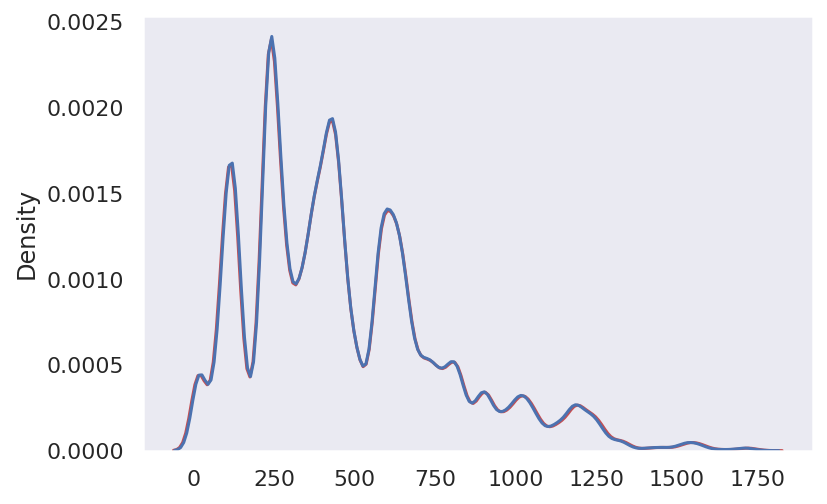

In [ ]:
# Use the method "predict" to predict an output on the polynomial features,
# then use the function "DistributionPlot" to display the distribution of the Predicted_Price vs the Weighted_Price from the test data

pred_results=linearModel.evaluate(test_data)
Y = pred_results.predictions.select('Weighted_Price').toPandas()
_Y = pred_results.predictions.select("Predicted_price").toPandas()
sns.set_style("dark")
ax1= sns.distplot(Y, hist=False, color="r", label="Actual Values")
sns.distplot(_Y, hist=False, color="b", label="Fitted Values" , ax=ax1)

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'BitCoin Weighted Prediction')

Text(0.5, 0, 'Weighted_Price')

Text(0, 0.5, 'Predicted_price')

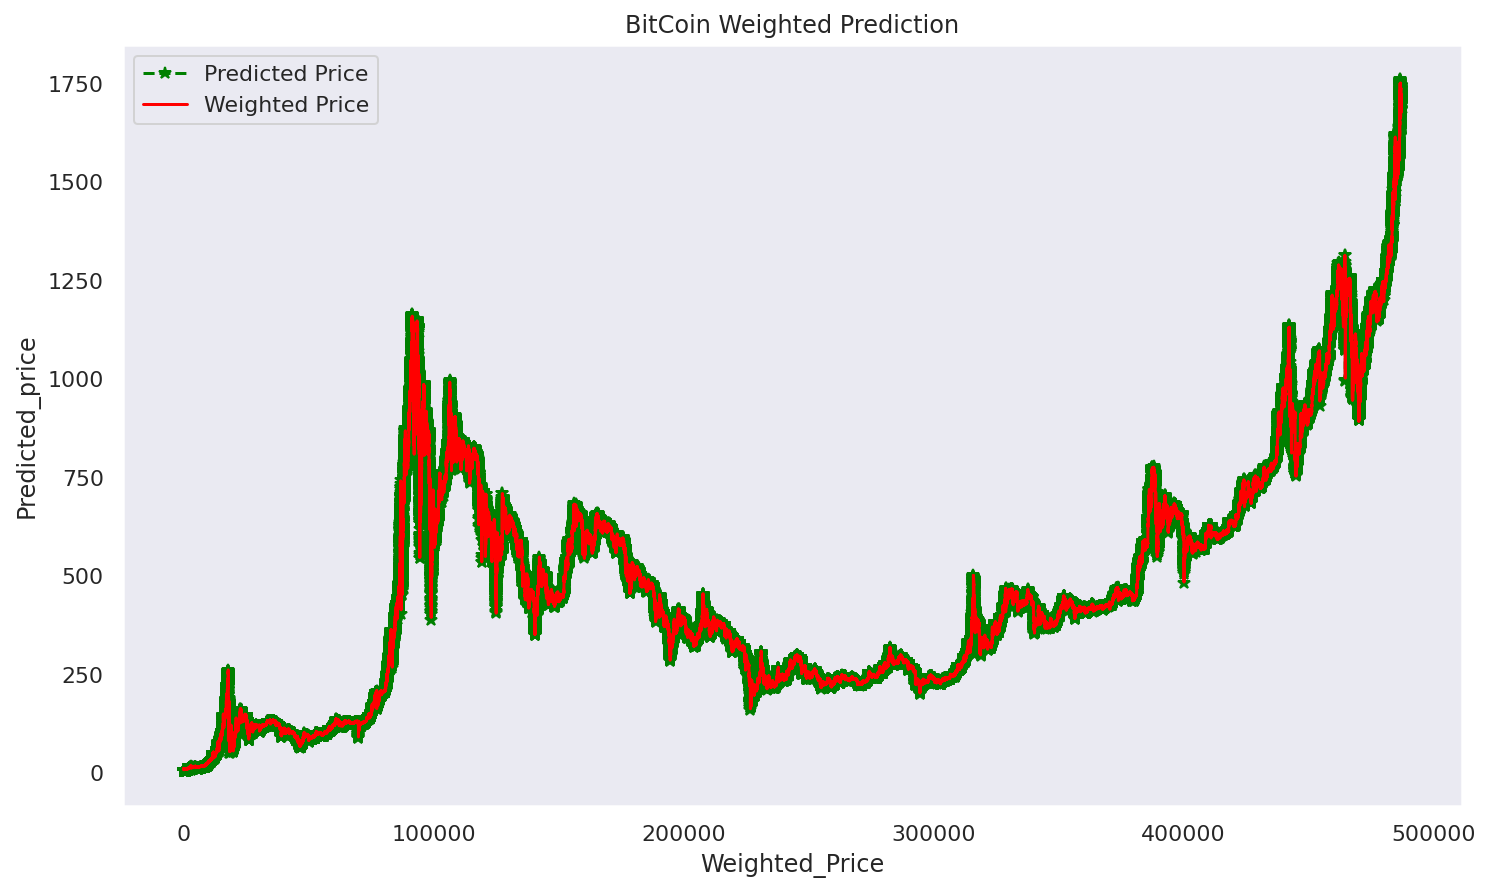

In [ ]:
#Plotting Weighted_price vs Predicted_price using Matplotlib
plt.figure(figsize=(12,7))
plt.plot(Y, color='green', marker='*', linestyle='dashed', 
         label='Predicted Price')
plt.plot(_Y, color='red', label='Weighted Price')
plt.title('BitCoin Weighted Prediction')
plt.xlabel('Weighted_Price')
plt.ylabel('Predicted_price')
plt.legend()

In [ ]:
spark.stop()